# Bring It All Together (pt. 1)

All thanks go to Sarah Stueve and Megh Krishnaswamy for their work on the notebook.

The goal of this notebook is to exercise the acquired Python knowledge obtained on day 2 of the Software Carpentries workshop.

You will be:
1. Importing the `gapminder_all.csv` file
2. Index contries, filter and remove redundant columns
3. Create a list of desired countries to compare and create a simple graph (frequency distribution table and word cloud)

---

## 1. Import required Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

---

## 2. Download, Import and Clean Data

In the next cell, use a bash one-liner (`wget <raw github url>`) to download the dataset from the github repository into Google Colab's file system, and use the correct functions to import the raw csv file and index by country.

To find the raw Github url for a file, click on the 'raw' button on the top right corner in the Github link to a file.

![](https://raw.githubusercontent.com/CosiMichele/2503-carp-biat/main/github_raw_button.png)

In [ ]:
# gt CSV file from a web url:
!wget https://raw.githubusercontent.com/CosiMichele/2503-carp-biat/refs/heads/main/gapminder_all.csv

--2025-03-23 05:17:31--  https://raw.githubusercontent.com/CosiMichele/2503-carp-biat/refs/heads/main/gapminder_all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘gapminder_all.csv’

gapminder_all.csv   100%[===================>]  47.93K  --.-KB/s    in 0.05s   

2025-03-23 05:17:31 (883 KB/s) - ‘gapminder_all.csv’ saved [49082/49082]



In [ ]:
raw_data = pd.read_csv("gapminder_all.csv").set_index("country")


### 2.1 Use the right function to drop the `continent` column.

In [ ]:
data = raw_data.drop(columns="continent")

### 2.2 Filter the columns

When filtering columns, you can use `data.drop(columns=data.filter(like="<column to drop>").columns)`. Here, `like` is used to search for a string in the column name, and `filter` removes all matches.

In the next 2 cells, first filter the `lifeExp_` column and the the `pop_` column.

In [ ]:
data = data.drop(columns=data.filter(like="lifeExp_").columns)

In [ ]:
data = data.drop(columns=data.filter(like="pop_").columns)

### 2.3 Print index

In order to continue, you will need to use the correct format for each country's name (as they appear in data frame). In the next cell, use a `for` loop to print the index (that in this case, is the countries).

In [ ]:
for i in data.index:
    print(i)

Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo Dem. Rep.
Congo Rep.
Cote d'Ivoire
Djibouti
Egypt
Equatorial Guinea
Eritrea
Ethiopia
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Kenya
Lesotho
Liberia
Libya
Madagascar
Malawi
Mali
Mauritania
Mauritius
Morocco
Mozambique
Namibia
Niger
Nigeria
Reunion
Rwanda
Sao Tome and Principe
Senegal
Sierra Leone
Somalia
South Africa
Sudan
Swaziland
Tanzania
Togo
Tunisia
Uganda
Zambia
Zimbabwe
Argentina
Bolivia
Brazil
Canada
Chile
Colombia
Costa Rica
Cuba
Dominican Republic
Ecuador
El Salvador
Guatemala
Haiti
Honduras
Jamaica
Mexico
Nicaragua
Panama
Paraguay
Peru
Puerto Rico
Trinidad and Tobago
United States
Uruguay
Venezuela
Afghanistan
Bahrain
Bangladesh
Cambodia
China
Hong Kong China
India
Indonesia
Iran
Iraq
Israel
Japan
Jordan
Korea Dem. Rep.
Korea Rep.
Kuwait
Lebanon
Malaysia
Mongolia
Myanmar
Nepal
Oman
Pakistan
Philippines
Saudi Arabia
Singapore
Sri Lanka
Syria
Taiwan
Thailand
Vietnam
West Bank 

### 2.4 Extract years

Extract year from last 4 characters of each column name.

The current column names are structured as `gdpPercap_(year)`, so we want to keep the `(year)` part only for clarity when plotting GDP vs. years.

To do this we use `replace()`, which removes from the string the characters stated in the argument. This method works on strings, so we use `replace()` from Pandas Series.str vectorized string functions.

In [ ]:
years = data.columns.str.replace('gdpPercap_', '')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

---

## 3 Visualizing Numerical Data: Listing and Plotting

In the next cell, select a country to plot.

<Axes: >

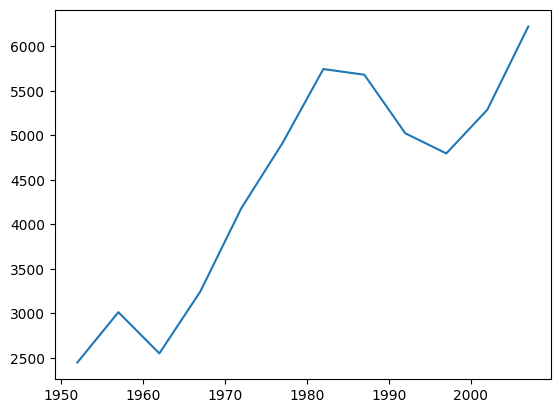

In [ ]:

data.loc['Algeria'].plot()

### 3.1 Create a list

Compare 5 countries of your choice. Create a list of countries that you are interested in.

In [ ]:
sel_countries = ["Algeria", "Angola", "Burundi", "Australia", "Italy"]

### 3.2 Use index.isin() to filter

`.isin(sel_countries)` checks whether each value in the index is present in the list `sel_countries`. Make sure to save to a different dataframe.

In [ ]:
data_countries = data[data.index.isin(sel_countries)]

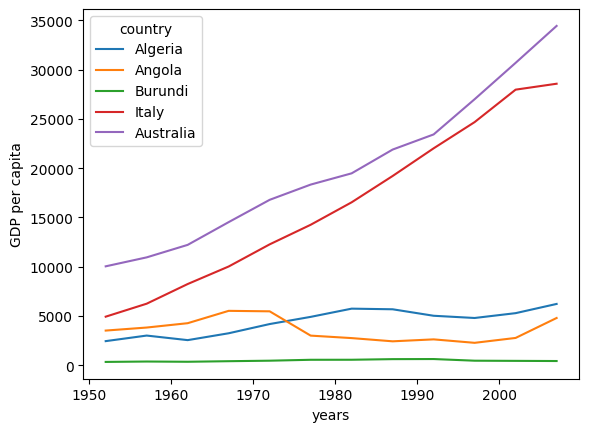

In [ ]:
data_countries.T.plot()
plt.ylabel('GDP per capita')
plt.xlabel('years')
plt.savefig("countries_comparison.png", dpi=300)

## 4 Visualizing Text Data: Plotting and Representing Frequency Distributions


For data distributed continuously, plots are straighforward to generate. But what about strings?

Let's say you want to find out how many countries there are in each continent. For this, we need to access the `continent` column in each row, and count how many rows each continent bin contains. This allows us numerical data from strings, that can then be plotted.


### 4.1 Using the right data

In [ ]:
print(raw_data.head(), "\n")

             continent  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
country                                                                  
Algeria         Africa     2449.008185     3013.976023     2550.816880   
Angola          Africa     3520.610273     3827.940465     4269.276742   
Benin           Africa     1062.752200      959.601080      949.499064   
Botswana        Africa      851.241141      918.232535      983.653976   
Burkina Faso    Africa      543.255241      617.183465      722.512021   

              gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
country                                                                        
Algeria          3246.991771     4182.663766     4910.416756     5745.160213   
Angola           5522.776375     5473.288005     3008.647355     2756.953672   
Benin            1035.831411     1085.796879     1029.161251     1277.897616   
Botswana         1214.709294     2263.611114     3214.857818     4551.142150   
B

In [ ]:
print(data.head())

                     1952         1957         1962         1967         1972  \
country                                                                         
Algeria       2449.008185  3013.976023  2550.816880  3246.991771  4182.663766   
Angola        3520.610273  3827.940465  4269.276742  5522.776375  5473.288005   
Benin         1062.752200   959.601080   949.499064  1035.831411  1085.796879   
Botswana       851.241141   918.232535   983.653976  1214.709294  2263.611114   
Burkina Faso   543.255241   617.183465   722.512021   794.826560   854.735976   

                     1977         1982         1987         1992         1997  \
country                                                                         
Algeria       4910.416756  5745.160213  5681.358539  5023.216647  4797.295051   
Angola        3008.647355  2756.953672  2430.208311  2627.845685  2277.140884   
Benin         1029.161251  1277.897616  1225.856010  1191.207681  1232.975292   
Botswana      3214.857818  

Can we use the filtered dataframe we created in Step 2? Why/Why not?

### 4.2 What are the continent names in this dataframe?

Multiple countries can belong to the same continent. And so, the values in the column `continent` is repeated.

If we want to find out which continents are listed in the dataframe, we only need to list each possible value in the column `continent` once, i.e., unique values in the column.

We use the function `<dataframe>['col_name'].unique()` for this:

In [ ]:
# Print unique values in the column
continents = raw_data['continent'].unique()
print(continents)


['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']


How many continents are present in this dataframe? Are any continents missing?

### 4.2 Filtering rows by continent:

Create a list of continents you want to plot:

In [ ]:
# Filter the DataFrame to keep only specified continents
allowed_continents = ['Asia', 'Europe', 'Oceania']


In [ ]:
filtered_data = raw_data[raw_data['continent'].isin(allowed_continents)]


### 4.3 Counting Countries in each continent

Next, we want to use the column `continent`, and count how many rows a given continent name is observed in. This gives us a frequency distribition!

For this, we use the `.value_counts())` function:

In [ ]:
# Print frequency table for each continent in the filtered dataframe
filtered_continent_freq_distr = filtered_data['continent'].value_counts()
print(filtered_continent_freq_distr)


continent
Asia       33
Europe     30
Oceania     2
Name: count, dtype: int64


In [ ]:
# Print frequency table for each continent in the raw dataframe
raw_continent_freq_distr = raw_data['continent'].value_counts()
print(raw_continent_freq_distr)

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: count, dtype: int64


This allows us to also check if our  filter worked correctly.

### 4.4 Visualising word frequencies with Bar Plots

We will now use the frequency distributions saved in the variables `filtered_continent_freq_distr` and `raw_continent_freq_distr` to count represent how many countries each continent has:



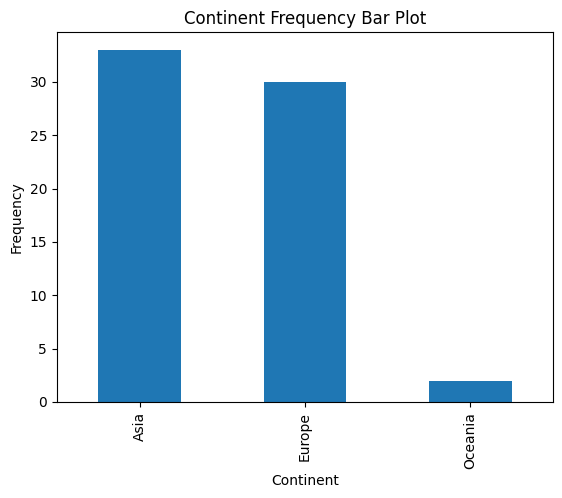

In [ ]:
# Generate bar plot for continent frequency in filtered dataframe:
filtered_continent_freq_distr.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Continent Frequency Bar Plot')
plt.savefig("continents_comparison.png", dpi=300)

Text(0.5, 1.0, 'Continent Frequency Bar Plot')

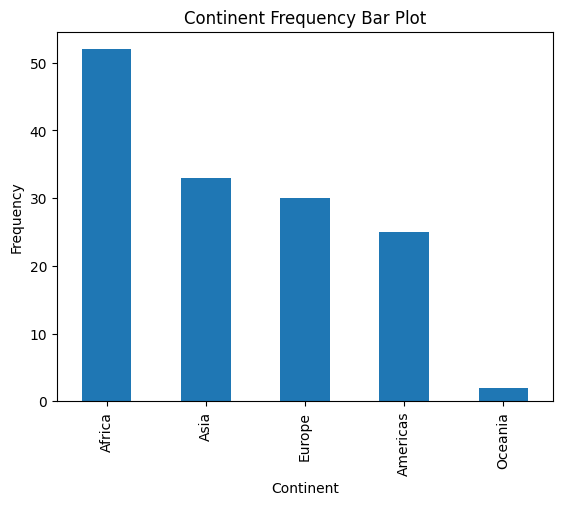

In [ ]:
# use the code above to generate a bar plot for all continents:
# Generate bar plot for continent frequency in filtered dataframe:
raw_continent_freq_distr.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Continent Frequency Bar Plot')

### 4.5 Visualising word frequencies with Wordclouds


Wordclouds are a fun tool to visualise how frequently a set of strings appear in a dataset. More frequent strings will be larger in size.

For this we will import the `wordcloud` python library, and the frequency distributions we printed in 4.3:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
filtered_wordcloud = WordCloud(width=500, height=500,
                      background_color='white').generate_from_frequencies(
                       filtered_continent_freq_distr)

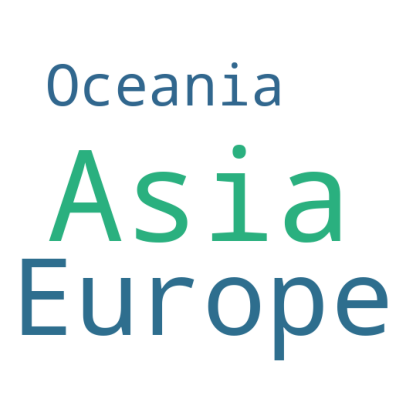

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(filtered_wordcloud)
plt.axis('off')
plt.savefig("continents_comparison_wordcloud.png", dpi=300)

### Which continent has the most countries?